In [66]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.activations import linear, relu, sigmoid
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os

In [2]:
data = tf.keras.datasets.mnist

In [3]:
(X_train,y_train),(X_test,y_test) = data.load_data()

In [41]:
X_train.shape

(60000, 28, 28)

In [4]:
# Normalizing the data (0-1)
X_train = tf.keras.utils.normalize(X_train,axis=1)
X_test  = tf.keras.utils.normalize(X_test,axis=1)

In [59]:
model = Sequential(
    [               
        Flatten(input_shape=(28,28)),
        Dense(units = 100, activation = 'relu'), # 28*28pixel image is flattened
        Dense(units = 50, activation = 'relu'),
        Dense(units = 10, activation = 'softmax'),
    ]
)

In [60]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [61]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 84,060 (328.36 KB)

 Trainable params: 84,060 (328.36 KB)

 Non-trainable params: 0 (0.00 B)

In [62]:
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8544 - loss: 0.5217
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9612 - loss: 0.1278
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9745 - loss: 0.0821
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9816 - loss: 0.0615
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9854 - loss: 0.0455
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9890 - loss: 0.0355
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9905 - loss: 0.0282
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9931 - loss: 0.0211
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9938 - loss: 0.0180
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9945 - loss: 0.0167


In [63]:
loss,accuracy = model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9690 - loss: 0.1172


In [64]:
print(loss)
print(accuracy)

0.10939177125692368
0.9725000262260437


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Neural Network predicted: 5


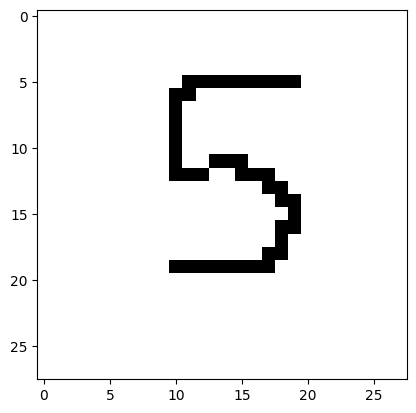

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Neural Network predicted: 6


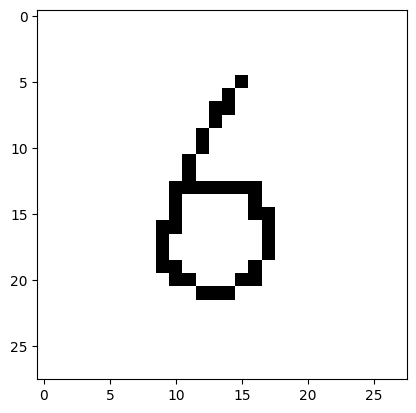

In [76]:
number = 1
while os.path.isfile(f"samples/sample{number}.png"):
    try:
        img = cv2.imread(f"samples/sample{number}.png")[:,:,0]
        img = np.invert(np.array([img]))
        prediction = model.predict(img)
        # np.argmax gives highest probability amongst the 10 elements in final array
        print(f"Neural Network predicted: {np.argmax(prediction)}")
        plt.imshow(img[0],cmap=plt.cm.binary)
        plt.show()
    except:
        print("Error")
    finally:
        number+=1